# Workflow for K-Nearest Neighbors on Weather Data

## Data Preparation
1. **Load Scaled Weather Data**: Import the dataset containing scaled temperature variables for multiple weather stations (e.g., Basel, Belgrade). 
2. **Select Relevant Variables**: Focus only on temperature variables (`_temp_mean`, `_temp_min`, `_temp_max`) from the scaled dataset.
3. **Load Answer Dataset**: Import the dataset containing labels for 'pleasant' (1) or 'unpleasant' (0) weather days.
4. **Prepare 'X' Matrix**: Drop unnecessary columns (`DATE`, `MONTH`) from the weather dataset to create the feature matrix (`X`).
5. **Prepare Target Data**: Drop the `DATE` column from the answer dataset to create the target vector (`y`).

## Data Splitting
6. **Train-Test Split**: Divide the data into training and testing sets, ensuring proper alignment between `X` and `y`.

## KNN Model Implementation
7. **Define k-Range**: Set up a range of `k` values (e.g., 1 to 4) to test different numbers of neighbors for KNN.
8. **Run KNN for Each k**:
   - Initialize the KNN classifier with the current `k`.
   - Fit the classifier to the training data.
   - Calculate and store training and testing accuracies.

9. **Add MultiOutputClassifier**: Extend the KNN model using `MultiOutputClassifier` for handling multiple labels (weather stations).
10. **Evaluate Optimal k**:
    - Identify the `k` value with the highest test accuracy.
    - Refit the model using the optimal `k`.

## Visualization
11. **Accuracy vs. k Plot**:
    - Plot training and testing accuracies against the number of neighbors to visualize performance trends.
    - Highlight the optimal `k`.

## Confusion Matrix Analysis
12. **List Unique Locations**: Extract and sort unique weather stations from the dataset.
13. **Compute Confusion Matrices**:
    - Loop through each station to calculate its confusion matrix.
    - Extract metrics: true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN).
14. **Prepare Metrics**:
    - Store station-wise accuracy rates, false positives, false negatives, and other relevant metrics for analysis.

## Visualization of Confusion Matrices
15. **Multi-Plot Confusion Matrices**:
    - Generate and display all 15 confusion matrices for each weather station side-by-side.
---
## Challenges & Adjustments
- **Class Imbalance**: Address cases where a label (pleasant/unpleasant) is missing for a specific station.
- **Model Tuning**: Adjust the `k` range or other hyperparameters as needed for better accuracy.
- **Scaling Impact**: Compare performance with scaled vs. unscaled data to assess preprocessing effects.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Loading the scaled weather data
weather_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\weather-data_scaled.csv'
weather_data = pd.read_csv(weather_data_path)

weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


• Selecting only temperature variables from the k-nearest neighbors coming training

In [4]:
# Selecting only temperature variables from the weather data
temp_columns = [col for col in weather_data.columns if 'temp' in col]
X = weather_data[temp_columns]

X.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,-1.136839,-0.114356,...,-0.063322,-0.391072,-0.290439,-0.639538,-0.257321,0.085361,-0.495396,-0.668215,-0.519743,-0.752237
1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,-1.341204,-0.367511,...,-0.839563,-0.415953,-0.183610,-0.628550,-0.335759,-0.056680,-0.521727,-0.548046,-0.629054,-0.407141
2,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,-1.116403,-0.509912,...,-0.898147,-0.615003,-0.410621,-0.727444,-0.210258,0.298424,-0.574390,-0.067372,0.054135,-0.177078
3,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,-1.208367,-0.525734,...,-1.059254,-0.764290,-0.530804,-0.925231,-0.069069,0.458220,-0.442733,-0.998679,-0.164486,-0.838511
4,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,-1.116403,-0.320045,...,-0.546642,-0.503037,-0.477389,-0.705467,-0.037694,0.600262,-0.521727,-1.509396,-1.339569,-1.471186


In [5]:
# Loading the answer dataset for pleasant/unpleasant weather
answers_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\1.4.Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'
answers_data = pd.read_csv(answers_data_path)

answers_data.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create an 'X' matrix by dropping the unneeded columns 

# Drop DATE and MONTH columns from X, and DATE from answers data
X = X.drop(columns=['DATE', 'MONTH'], errors='ignore')
y = answers_data.drop(columns=['DATE'], errors='ignore')

In [7]:
# Check the resulting shapes of X and y to confirm they are prepared for KNN
print(X.shape, y.shape)

(22950, 52) (22950, 15)


In [8]:
#Code Snippets

#Snippet A:

from sklearn.multioutput import MultiOutputClassifier

In [9]:
#Another needed libary 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [10]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Define the range of k values to test
k_range = np.arange(1, 5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Run KNN with neighbors equal to 1 to 4 and test the accuracy
for i, k in enumerate(k_range):
    print(f"Testing K={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)  # Add MultiOutputClassifier

    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Calculate and store train/test accuracies
    train_acc[i] = classifier.score(X_train, y_train)  # Update for classifier
    test_acc[i] = classifier.score(X_test, y_test)  # Update for classifier

# Display the accuracies
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Testing K=1
Testing K=2
Testing K=3
Testing K=4
Training accuracy: [1.         0.54520102 0.55054613 0.5001162 ]
Testing accuracy: [0.425061   0.43290345 0.44597421 0.44649704]


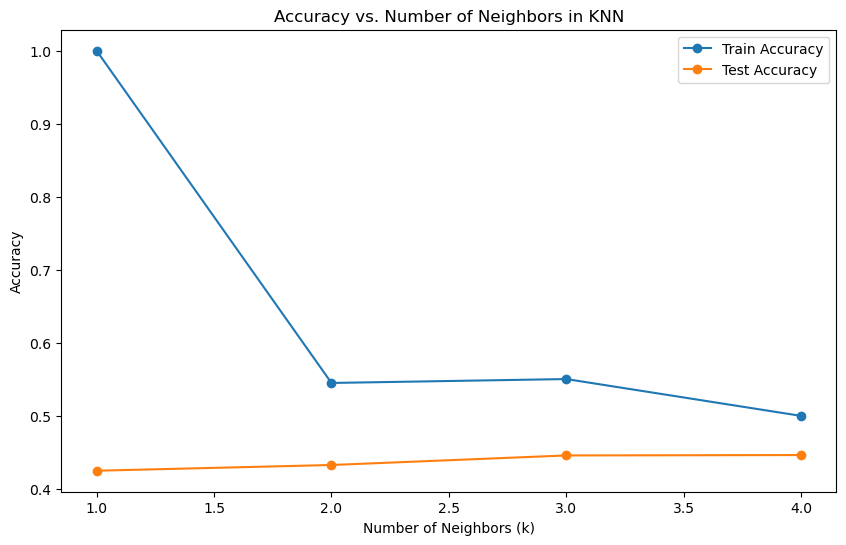

In [12]:
# Plot the relationship between number of neighbors and accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_acc, label='Train Accuracy', marker='o')
plt.plot(k_range, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors in KNN')
plt.legend()
plt.show()

C:\Users\isaac\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


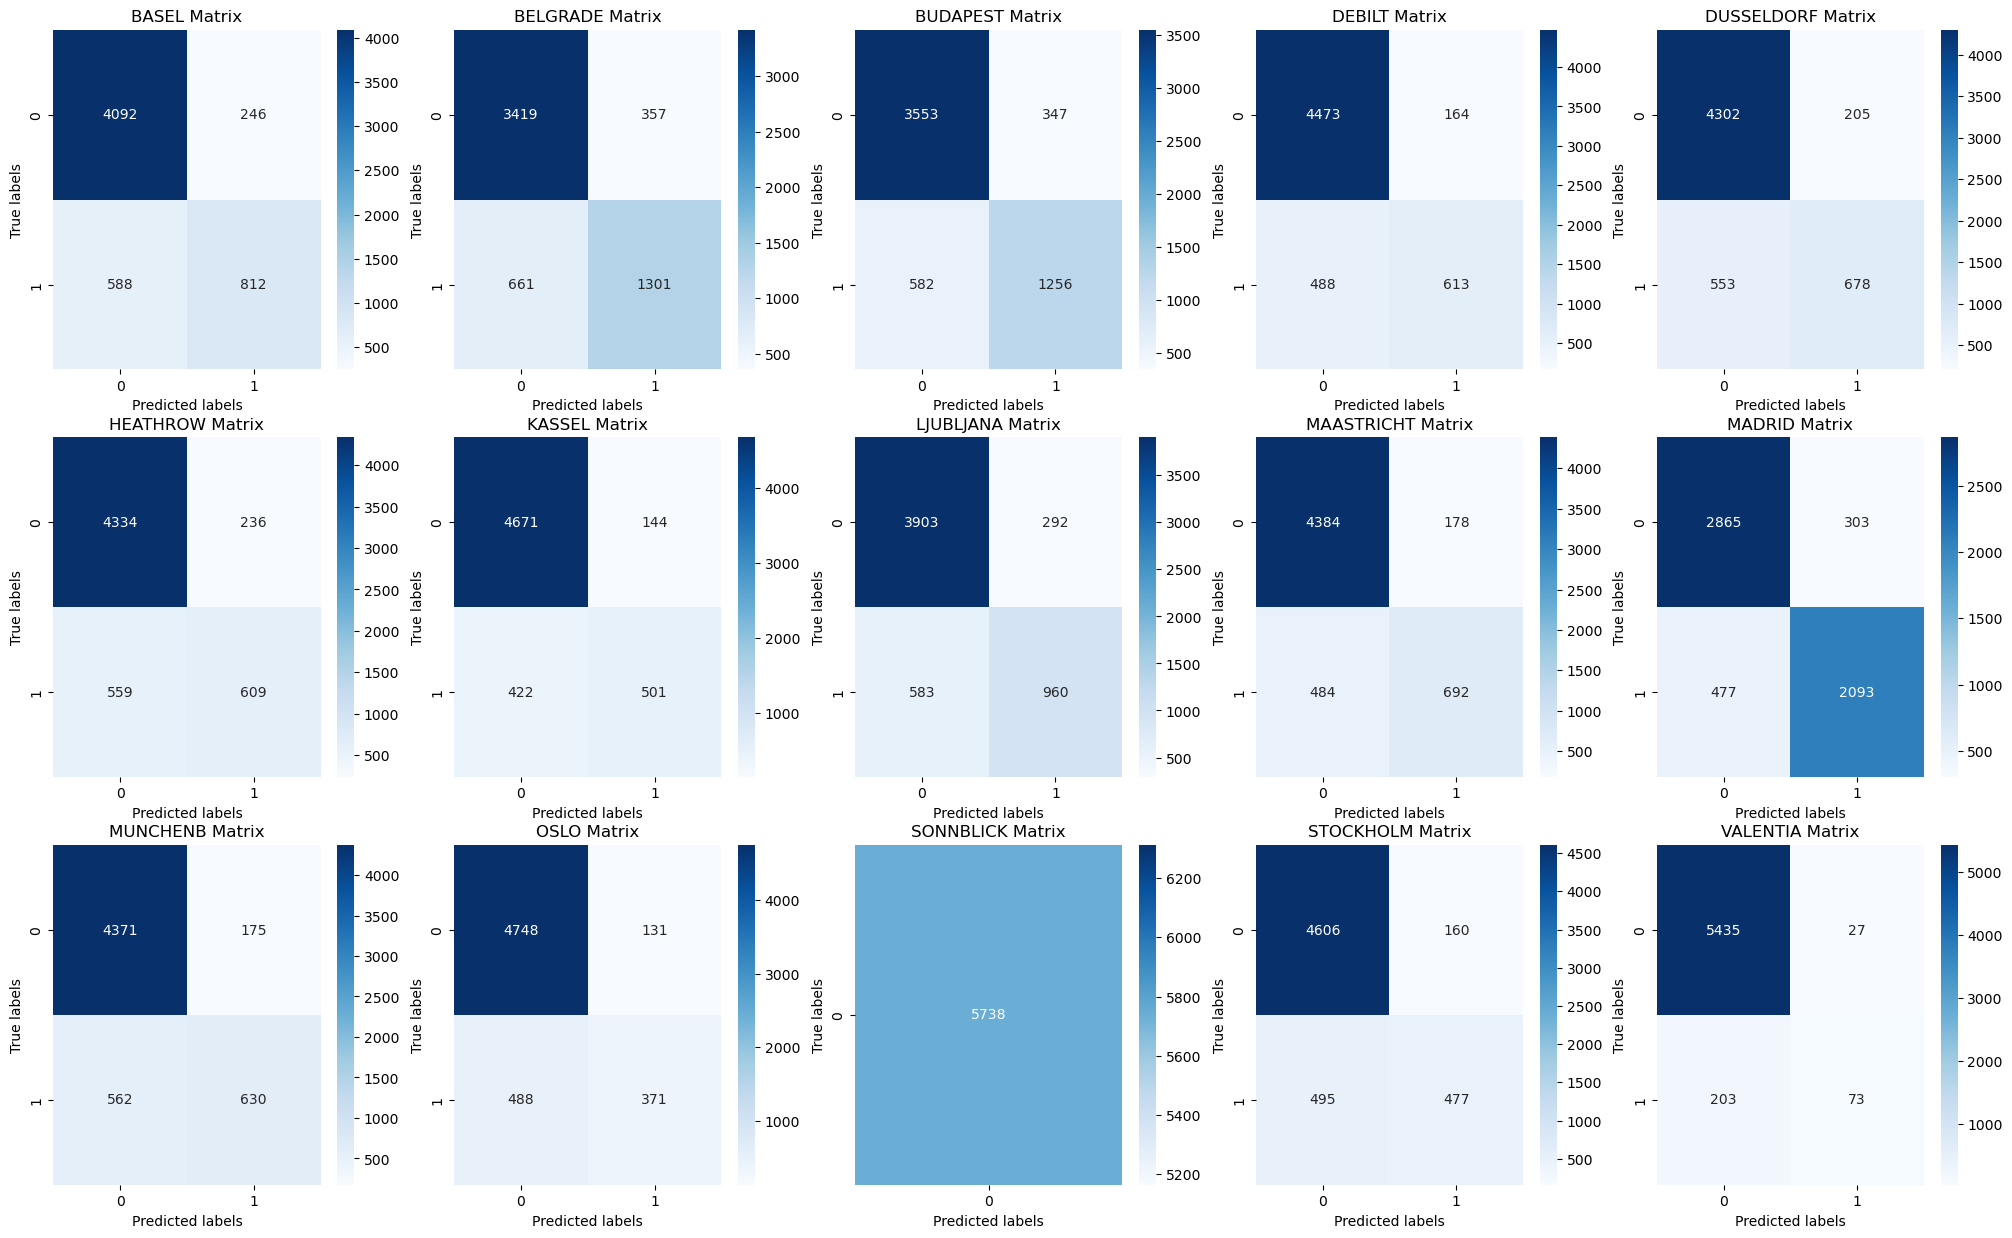

In [13]:
# Use the optimal k (e.g., where test accuracy is highest)
optimal_k = k_range[np.argmax(test_acc)]
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
classifier_optimal = MultiOutputClassifier(knn_optimal, n_jobs=-1)
classifier_optimal.fit(X_train, y_train)
y_pred = classifier_optimal.predict(X_test)

# List unique locations based on column names in y_test
locations = list({col.split("_")[0] for col in y.columns if col not in ["MONTH", "DATE"]})
locations.sort()

# Prepare to plot all 15 confusion matrices
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(f'{name} Matrix')
            count += 1

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\1.4 Task\confusion_matrices.png'
plt.savefig(output_path)
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

# Initialize lists to store metrics
station_names = locations  # Replace 'locations' if it's different in your notebook
accurate_predictions = []
false_positives = []
false_negatives = []
accuracy_rates = []

# Loop through each station
for idx, station in enumerate(station_names):
    # Calculate confusion matrix for each station with specified labels [0, 1]
    cm = confusion_matrix(y_test.loc[:, station + "_pleasant_weather"], y_pred[:, idx], labels=[0, 1])

    # Extract TP, FP, FN, TN from the confusion matrix
    if cm.shape == (2, 2):
        true_negative, false_positive, false_negative, true_positive = cm.ravel()
    else:
        # Handle cases where only one label exists
        true_negative, false_positive, false_negative, true_positive = (cm[0, 0], 0, 0, cm[0, 0]) if cm.shape == (1, 1) else (0, 0, 0, 0)
    
    total_correct = true_positive + true_negative
    total_predictions = cm.sum()

    # Calculate metrics
    accurate_predictions.append(total_correct)
    false_positives.append(false_positive)
    false_negatives.append(false_negative)
    accuracy_rates.append(total_correct / total_predictions * 100 if total_predictions > 0 else 0)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Weather Station": station_names,
    "Accurate Predictions": accurate_predictions,
    "False Positive": false_positives,
    "False Negative": false_negatives,
    "Accuracy Rate (%)": accuracy_rates
})

# Calculate the average accuracy rate
average_accuracy = results_df["Accuracy Rate (%)"].mean()
results_df.loc["Average"] = ["", "", "", "", average_accuracy]

# Display the table
results_df

,Weather Station,Accurate Predictions,False Positive,False Negative,Accuracy Rate (%)
0,BASEL,4904,246,588,85.465319
1,BELGRADE,4720,357,661,82.258627
2,BUDAPEST,4809,347,582,83.809690
3,DEBILT,5086,164,488,88.637156
4,DUSSELDORF,4980,205,553,86.789822
5,HEATHROW,4943,236,559,86.144998
6,KASSEL,5172,144,422,90.135936
7,LJUBLJANA,4863,292,583,84.750784
8,MAASTRICHT,5076,178,484,88.462879
9,MADRID,4958,303,477,86.406413
